# Notebook 2 - Polinômio de Taylor e Método da Bisseção

Gabrielly de Andrade da Silva - 116149740

## 1. Polinômio de Taylor

O polinômio de Taylor (Pn) descreve um polinômio em torno de um determinado ponto. Vamos denotar o grau como **n**, a função **f** e o ponto **a**

$$
    Pn(x) = f(a) + f'(a)(x-a) + \frac{f''(a)(x-a)^2}{2} + \frac{f'''(a)(x-a)^3}{3!} + ... + \frac{f'''(a)(x-a)^n}{n!} 
$$

**Exemplo:**

Considere $fn(x) = e^x$

Sabemos que todas as suas derivadas valem o próprio $e^x$

Com isso temos o seguinte polinômio de Taylor:

$$
    Pn(x) = e^x + e^xx + \frac{e^xx^2}{2} + ... + \frac{e^xx^n}{n!}
$$

Considerando o ponto a=0 e n=3, o valor da função f(a) no ponto vale $e^a = e^0 = 1$, com isso temos que:

$$
    Pn(x) = 1 + x + \frac{x^2}{2} + \frac{x^3}{3!}
$$

Considerando o valor de $x=1$, temos que o valor da função deve valer $f(1)=e$, com isso o polinômio também deve aproximar desse valor $Pn(1)=e$.

Sendo assim, o valor da função $e^x$ também é descrita como um somatório dos termos

$$
    1 + x + \frac{x^2}{2} + ... + \frac{x^n}{n!}
$$

sendo n o valor do grau do polinômio.

Vamos realizar alguns testes com o Julia

In [1]:
MathConstants.e

ℯ = 2.7182818284590...

In [2]:
exp(1)

2.718281828459045

In [3]:
function exp_por_taylor(x, n)
    # Calcula a exponencial de e^x com n termos pelo polinômio de Taylor
    
    soma = 1.0
    for i = 1:n
        soma += x^i / factorial(i) # Poderia ser factorial(BigInt(i)) mas não tem necessidade pois os termos tentes a zero
    end
    return soma
end

exp_por_taylor (generic function with 1 method)

In [4]:
exp_por_taylor(1.0, 1)

2.0

In [5]:
# Função genérica que calcula a quantidade de termos necessárias
n = 0
somatorio = exp_por_taylor(1, n)
while somatorio <= exp(1)
    n += 1
    somatorio = exp_por_taylor(1, n)
end

println("Somatório: ", somatorio)
println("Quantidade de termos (grau do polinômio): ", n)



Somatório: 2.7182818284590455
Quantidade de termos (grau do polinômio): 17


In [6]:
# Calculando a diferença do erro absoluta

exp_por_taylor(1.0, 17) - exp(1.0)

4.440892098500626e-16

In [7]:
# Caso que da overflow por conta do 21!
exp_por_taylor(5.0, 30) - exp(5.0)

LoadError: OverflowError: 21 is too large to look up in the table; consider using `factorial(big(21))` instead

In [8]:
function exp_por_taylor_2(x, n)
    # Calcula a exponencial de e^x com n termos pelo polinômio de Taylor
    
    soma = 1.0
    termo_anterior = 1.0
    for i = 1:n
        termo_anterior *= x / i
        soma += termo_anterior
    end
    return soma
end

exp_por_taylor_2 (generic function with 1 method)

Com essa nova função não temos Overflow pois estamos calculando o próximo termo a partir do resultado do termo anterior

$$
    a_{n} = \frac{x^n}{n!} = \frac{x}{n} * \frac{x^(n-1)}{(n-1)!}
$$

In [9]:
exp_por_taylor_2(5.0, 32)

148.4131591025766

In [10]:
exp(5.0)

148.4131591025766

Nota: diferentemente do que foi visto no [vídeo](https://www.youtube.com/watch?v=220qYWumBHI&feature=youtu.be&list=PLOOY0eChA1uyO7qjoupZ3979741csLLTE&t=4024), tanto o exponencial do Julia quanto da função calculada chegaram a um mesmo valor

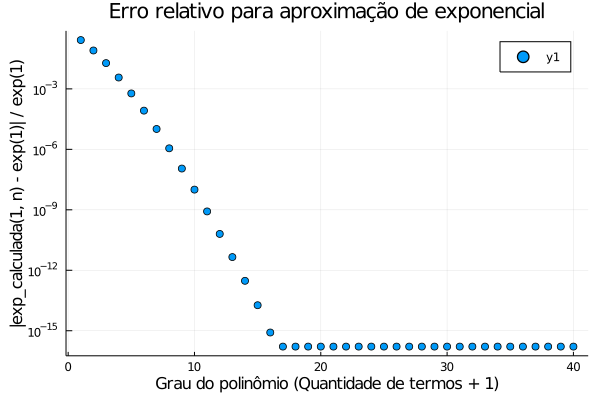

In [11]:
using Plots
N = collect(1:40)
x = 1
Erro = [abs(exp_por_taylor_2(x, n) - exp(x)) / exp(x) for n in N]

scatter(N, Erro, yaxis=:log)
xlabel!("Grau do polinômio (Quantidade de termos + 1)")
ylabel!("|exp_calculada($x, n) - exp($x)| / exp($x)")
title!("Erro relativo para aproximação de exponencial")

In [12]:
# Outra abordagem que simula o exp(x) do Julia

function exp_por_taylor_3(x)
    # Calcula a exponencial de e^x com n termos pelo polinômio de Taylor
    
    soma = 1.0
    termo_anterior = 1.0
    i = 1
    while soma + termo_anterior != soma
        termo_anterior *= x / i
        soma += termo_anterior
        i +=1
    end
    return soma
end

exp_por_taylor_3 (generic function with 1 method)

In [13]:
exp_por_taylor_3(1)

2.7182818284590455

In [14]:
exp(1)

2.718281828459045

In [15]:
exp_por_taylor_3(1) - exp(1)

4.440892098500626e-16

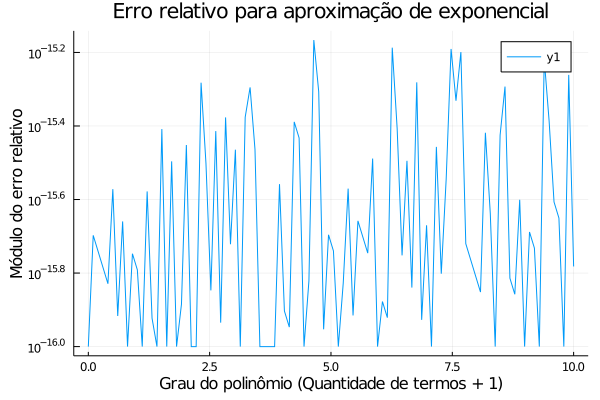

In [16]:
using Plots
X = range(0.0, 10.0, length=100)
Erro = [max(abs(exp_por_taylor_3(x) - exp(x)) / exp(x), 1e-16) for x in X]

plot(X, Erro, yaxis=:log)
xlabel!("Grau do polinômio (Quantidade de termos + 1)")
ylabel!("Módulo do erro relativo")
title!("Erro relativo para aproximação de exponencial")
# Erro precisa estar próximo da precisão da máquina, 10^-16

### Aproximando com séries alternadas

Séries alternadas são difíceis de manter, veja o erro na plotagem abaixo


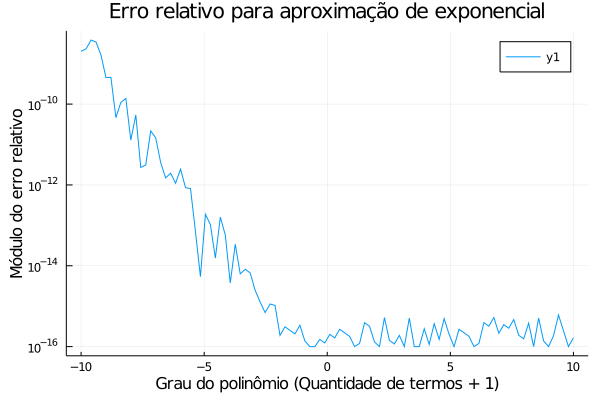

In [17]:

using Plots
X = range(-10.0, 10.0, length=100)
Erro = [max(abs(exp_por_taylor_3(x) - exp(x)) / exp(x), 1e-16) for x in X]

plot(X, Erro, yaxis=:log)
xlabel!("Grau do polinômio (Quantidade de termos + 1)")
ylabel!("Módulo do erro relativo")
title!("Erro relativo para aproximação de exponencial")

In [18]:
# Outra abordagem que simula o exp(x) do Julia, mas agora olhando para cálculos negativos

function exp_por_taylor_4(x)
    # Calcula a exponencial de e^x com n termos pelo polinômio de Taylor
    
    if  x>= 0
        return exp_por_taylor_3(x)
    else
        return 1.0 / exp_por_taylor_3(-x)

    end
end

exp_por_taylor_4 (generic function with 1 method)

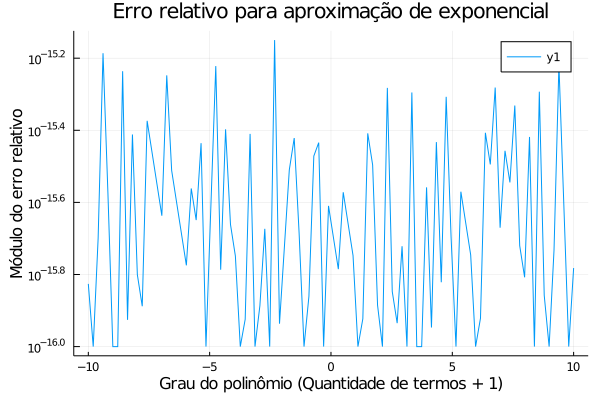

In [19]:
using Plots
X = range(-10.0, 10.0, length=100)
Erro = [max(abs(exp_por_taylor_4(x) - exp(x)) / exp(x), 1e-16) for x in X]

plot(X, Erro, yaxis=:log)
xlabel!("Grau do polinômio (Quantidade de termos + 1)")
ylabel!("Módulo do erro relativo")
title!("Erro relativo para aproximação de exponencial")


## Calculando aproximação de pi

Aproximação do valor de pi

Seja a função $f(x)$ definida por $arctg(x)$, vamos calular uma aproximação usando o polinômio de Taylor. 
Sabemos que $f'(x) = \frac{1}{1+x^2}$ e esse resultado também pode ser definido como a seguinte progressão geométrica (PG)

$$
    \frac{1}{1+x^2} = 1 - x^2 + x^4 - x^6 + x^8 ...
$$

Integrando o resultado temos que:

$$
    x - \frac{x^3}{3} + \frac{x^5}{5} - \frac{x^7}{7} + ...
$$

Nota: Um fato curioso foi descobrir que poderíamos simplificar com uma série ao invés de fazer todos os cálculos de derivada na mão

In [20]:
function pi_atan(n)
    # pi ~= 4 * (1 - 1/3 + 1/5 - 1/7 + 1/9 para n termos)
    # n   =      1    2     3     4     5
    
    sinal = 1.0
    soma = 0.0
    denominador = 1
    
    for i=1:n
        soma += sinal * 1/denominador
        sinal *= -1
        denominador += 2
    end
    
    return 4 * soma
end

pi_atan (generic function with 1 method)

In [21]:
pi_atan(3)

3.466666666666667

In [22]:
4 * (1.0 - 1.0/3.0 + 1.0/5.0)

3.466666666666667

In [23]:
@assert pi_atan(3) ≈ 4 * (1.0 - 1.0/3.0 + 1.0/5.0)

In [24]:
# Função genérica que calcula a soma de pi para n termos
n = 10
for i=1:n
    println("Termos: ", i)
    println("Somatório: ", pi_atan(i))
    println("")
end

# Nota: com poucos termos isso não é satisfatório, os valores oscilam e não convergem para uma maior precisão em número de casas

Termos: 1
Somatório: 4.0

Termos: 2
Somatório: 2.666666666666667

Termos: 3
Somatório: 3.466666666666667

Termos: 4
Somatório: 2.8952380952380956

Termos: 5
Somatório: 3.3396825396825403

Termos: 6
Somatório: 2.9760461760461765

Termos: 7
Somatório: 3.2837384837384844

Termos: 8
Somatório: 3.017071817071818

Termos: 9
Somatório: 3.2523659347188767

Termos: 10
Somatório: 3.0418396189294032



In [25]:
pi_atan(10000)

3.1414926535900345

In [26]:
pi

π = 3.1415926535897...

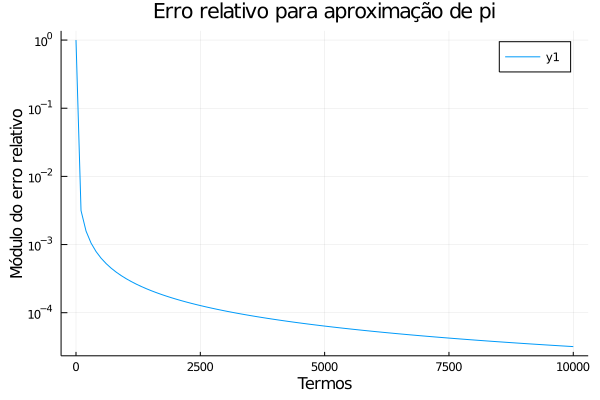

In [27]:
using Plots
X = range(0, 10000, length=100)
Erro = [max(abs(pi_atan(x) - pi) / pi, 1e-16) for x in X]

plot(X, Erro, yaxis=:log)
xlabel!("Termos")
ylabel!("Módulo do erro relativo")
title!("Erro relativo para aproximação de pi")


**Nota:** Aqui temos um fato curioso, comparando com o exponencial anterior para termos um erro relativo baixo precisamos de muitos termos 

## 2. Zeros de função

Nesse problema queremos calcular uma função que em um intervalo o seu valor seja zero $f(x) = 0$.

Um caso comum: $xe^x = 1$

In [3]:
using Plots
gr(size=(600,400))

Plots.GRBackend()

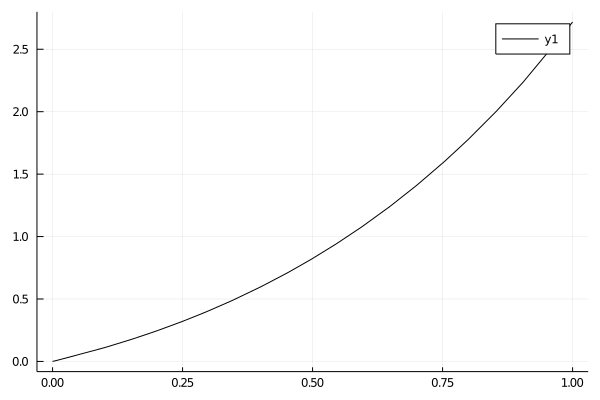

In [6]:
f(x) = exp(x) * x
plot(f, 0, 1, c=:black)

**Teorema do valor intermediário**: https://pt.khanacademy.org/math/ap-calculus-ab/ab-limits-new/ab-1-16/a/intermediate-value-theorem-review

### Método da bissecção

Método para identificar o zero da função a partir de múltiplos métodos de divisão (cortes) na função

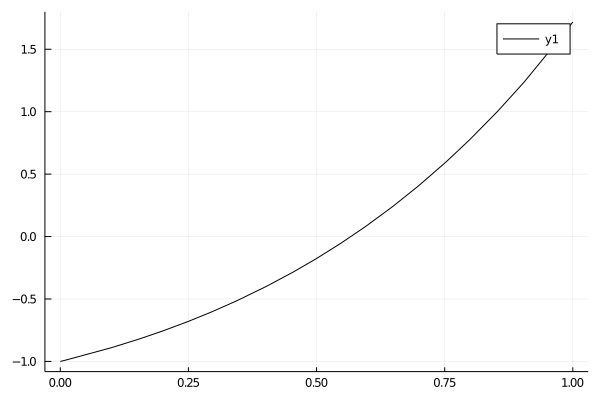

In [7]:
f(x) = exp(x) * x - 1
plot(f, 0, 1, c=:black)

Ao sair dos extremos de entre 0 e ~2.7, vemos que o zero se encontre mais ou menos na metade.

Tendo dois pontos A e B, considerando que A < 0 e B > 0, com certeza em algum lugar nesse intervalo a minha função passa por zero considerando que ela é contínua (ideia do teorema do valor intermediário)

### Teorema

Se f é contúnua em $[a, b]$ e $f(a)$ e $f(b)$ tem sinais opostos, então $a_k, b_k, x_k -> x'$, onde $x'$ é zero de  $f$

### Método da bissecção

- Dado $[a,b]$ com $f(a)*f(b) < 0$
- Escolho c pertencente a $(a,b), (c = \frac{a+b}{2})$
- Se $f(c)=0$, Fim
- Senão $f(a)*f(c) < 0$ ou $f(c)*f(b) < 0$, logo escolho o intervalo correspondente e repito

In [114]:
f(x) = x * exp(x) - 1
a, b = 0.0, 1.0

(0.0, 1.0)

In [115]:
# Passo 1: sinais opostos

@assert f(a)*f(b) < 0 # Validado

In [119]:
# Passo 2: Validar extremos

x = (a + b) / 2
if f(a) * f(x) < 0
    b = x
else
    a = x
end
x, f(x)

(0.5625, -0.012781755459832067)

### Critérios de parada de função

Por conta do limite da máquina e pensando que o algoritmo precisa executar em um tempo finito, precisamos pensar em uma condição de parada.
Diferentemente de um método, a diferença é sutil uma vez que um método poderá convergir para o infinito, já no algoritmo não.

Para pensar na condição de parada, vamos pensar sobre o erro absoluto e o erro relativo

#### Erro absoluto

$$
    | x - x'|
$$

#### Erro relativo

$$
    \frac{| x - x'|}{|x|}
$$

Podemos escolher uma tolerância, escolhida pelo usuário, como critério de parada. 
Podemos definir o quanto de erro o usuário estará disposto a aceitar

$|f(x) < E|$ onde E (epsilon) é a tolerância 

$$
    |f(x)| < E_A + E_R * |f(x_0)|
$$

- $E_A$ => tolerância absoluta 
- $E_R$ => tolerância relativa

**Nota:** O erro relativo nos ajuda a entender a ordem de grandeza do número que estamos trabalhando. 
Ex.: `R$ 1` perto de `R$ 1.000.000` é pouco, mas comparando com `R$ 2` é o dobro.

**Nota 2:** Quando estamos trabalhando com funções bem comportadas e que possui uma estimativa boa do seu valor real, às vezes poderá ser usado somente a tolerância absoluta

Considerando o esboço do algoritmo feito anteriormente e as tolerâncias apresentadas, podemos declarar como critério de parada do algoritmo sempre que estivermos muito próximo da tolerância, seja ela absoluta ou relativa. Logo, quando o intervalo estiver pequeno não precisaremos mais considerar realizar novamente o método pois o resultado esperado já estará sendo atendido.

**Situações que podem demorar:**
- muitas iterações sem convergir para um valor
- número de avaliações de f grande, cada método que calcula $f(x)$
- tempo (o método é caro)

In [120]:
# Implementação considerando que a função é contínua e situações que podem demorar

function bisseccao(f, a, b; tol_absoluta = 1e-8, tol_relativa = 1e-8, max_tempo = 10.0, max_iteracao = 1000)
    fa = f(a)
    fb = f(b)
    e = tol_absoluta + tol_relativa * max(abs(fa), abs(fb))
    
    if abs(fa) <= e
        return a, fa, :sucesso
    elseif abs(fb) <= e
        return b, fb, :sucesso
    elseif fa * fb >= 0
        return a, fa, :falha__sinais_opostos
    end
    
    x = (a + b) / 2
    fx = f(x)
    t0 = time()
    variacao_tempo = time() - t0
    
    
    
end

bisseccao (generic function with 1 method)